In [46]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm

# DF 생성 및 날짜 컬럼 타입 변환
w_df=pd.read_csv('daegu_utf8.csv')
w_df['날짜']=w_df['날짜'].astype('datetime64')
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41450 entries, 0 to 41449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41450 non-null  datetime64[ns]
 1   지점      41450 non-null  int64         
 2   평균기온    41450 non-null  float64       
 3   최저기온    41450 non-null  float64       
 4   최고기온    41450 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


In [47]:
w_df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0


In [48]:
# 사용자 정의 함수
# 온도 데이터 추출 및 그래프 생성
def TempP(year1, year2, m):
    high_temp=[]
    low_temp=[]
    # 데이터 추출
    for y in range(year1,year2+1):
        year_df=w_df[w_df['날짜'].dt.year==y]
        year_df=year_df[year_df['날짜'].dt.month==m]
        high_temp.append(year_df['최고기온'].mean())
        low_temp.append(year_df['최저기온'].mean())
    
    # 그래프 생성
    print(f"{year1}년부터 {year2}년까지 {m}월의 기온 변화 \n {m}월 최저기온 평균 :\n {np.round(low_temp,1)} \n {m}월 최고기온 평균 :\n {np.round(high_temp,1)}")
    plt.figure(figsize=(20,4))
    plt.plot(range(year1,year2+1), high_temp, 'tomato', marker='o', label='최고기온')
    plt.plot(range(year1,year2+1), low_temp, 'royalblue', marker='o', label='최저기온')
    
    # 운영체제별 폰트 설정
    if platform.system() == 'Windows':
        font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
        plt.rc('font', family=font_name)
    else:
        plt.rc('font', family='AppleGothic', size=8)

    # 마이너스 기호 출력 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False
    plt.title(f'{year1}년부터 {year2}년까지 {m}월의 기온 변화', size=16)
    plt.legend(loc=2)
    plt.show()

시작 연도를 입력하세요.2020
마지막 연도를 입력하세요.2022
월을 입력하세요.5
2020년부터 2022년까지 5월의 기온 변화 
 5월 최저기온 평균 :
 [14.  12.8 14.1] 
 5월 최고기온 평균 :
 [25.7 24.3 27.4]


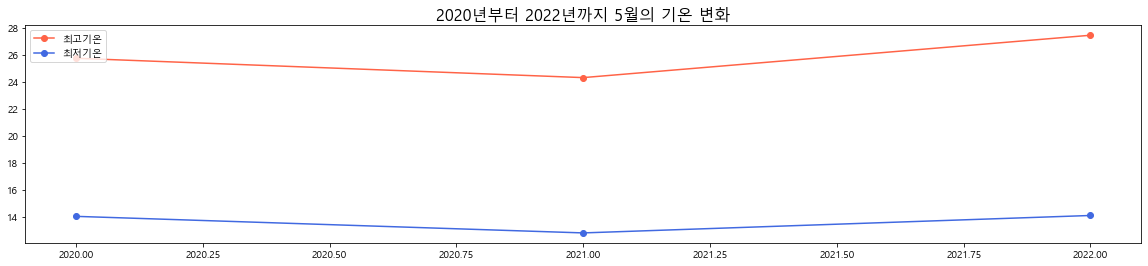

In [49]:
year1=int(input('시작 연도를 입력하세요.'))
year2=int(input('마지막 연도를 입력하세요.'))
m=int(input('월을 입력하세요.'))
TempP(year1, year2, m)